In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print(f"Розмір тренувальної вибірки: {x_train.shape}")
print(f"Розмір тестової вибірки: {x_test.shape}")
print(f"Кількість класів: {len(np.unique(y_train))}")

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print(f"Розмір після перетворення: {x_train_flat.shape}")

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)


Розмір тренувальної вибірки: (60000, 28, 28)
Розмір тестової вибірки: (10000, 28, 28)
Кількість класів: 10
Розмір після перетворення: (60000, 784)


In [5]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
history = model.fit(
    x_train_flat, y_train_cat,
    batch_size=128,
    epochs=10,
    validation_data=(x_test_flat, y_test_cat),
    verbose=1
)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8663 - loss: 0.4440 - val_accuracy: 0.9485 - val_loss: 0.1657
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9433 - loss: 0.1942 - val_accuracy: 0.9651 - val_loss: 0.1178
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9563 - loss: 0.1479 - val_accuracy: 0.9702 - val_loss: 0.0957
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9640 - loss: 0.1221 - val_accuracy: 0.9732 - val_loss: 0.0851
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9678 - loss: 0.1066 - val_accuracy: 0.9750 - val_loss: 0.0798
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9709 - loss: 0.0953 - val_accuracy: 0.9763 - val_loss: 0.0747
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9730 - loss: 0.0852 - val_accuracy: 0.9740 - val_loss: 0.0850
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9759 - loss: 0.0751 - val_accuracy: 0.

In [8]:
test_loss, test_accuracy = model.evaluate(x_test_flat, y_test_cat, verbose=0)
print(f"Точність на тестових даних: {test_accuracy:.4f}")
print(f"Втрати на тестових даних: {test_loss:.4f}")

y_pred = model.predict(x_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nЗвіт класифікації:")
print(classification_report(y_test, y_pred_classes))


Точність на тестових даних: 0.9788
Втрати на тестових даних: 0.0687
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 881us/step

Звіт класифікації:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.97      0.98       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



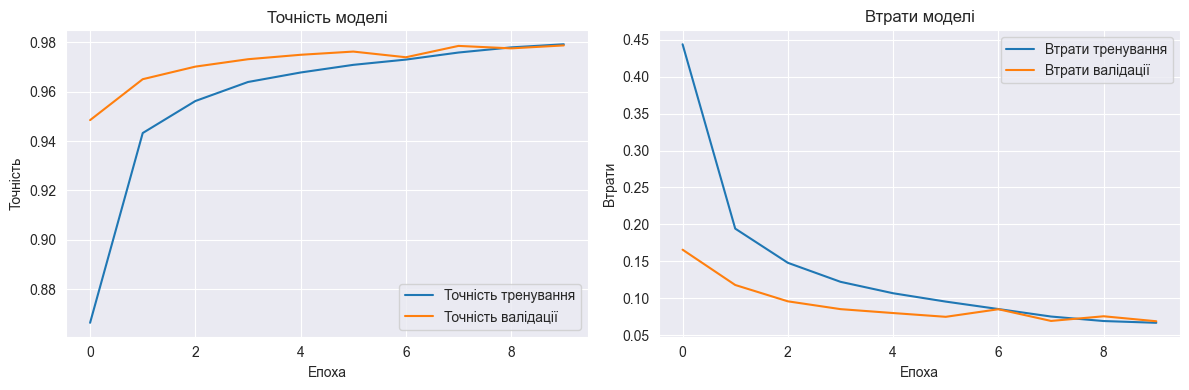

In [9]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність тренування')
plt.plot(history.history['val_accuracy'], label='Точність валідації')
plt.title('Точність моделі')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати тренування')
plt.plot(history.history['val_loss'], label='Втрати валідації')
plt.title('Втрати моделі')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

plt.tight_layout()
plt.show()


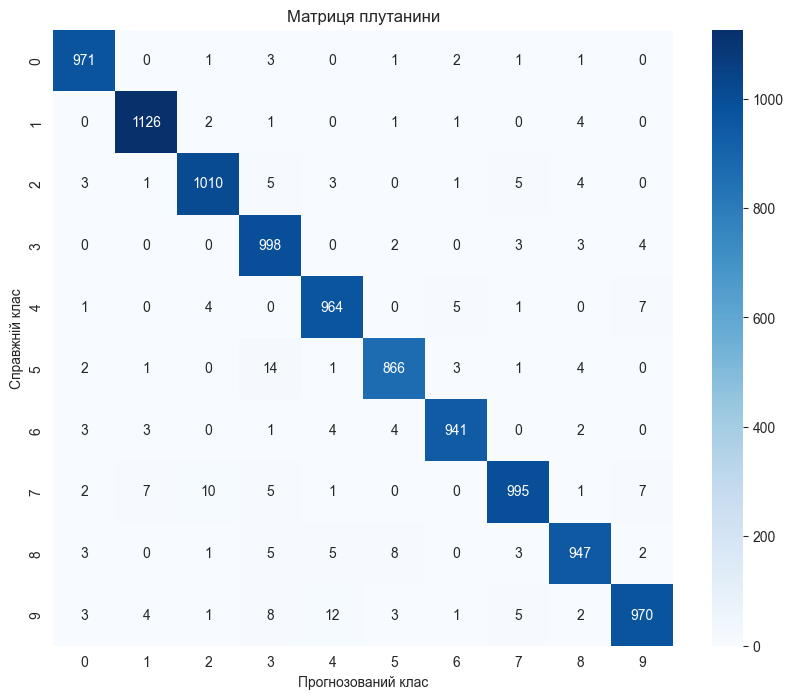

In [10]:
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Матриця плутанини')
plt.xlabel('Прогнозований клас')
plt.ylabel('Справжній клас')
plt.show()


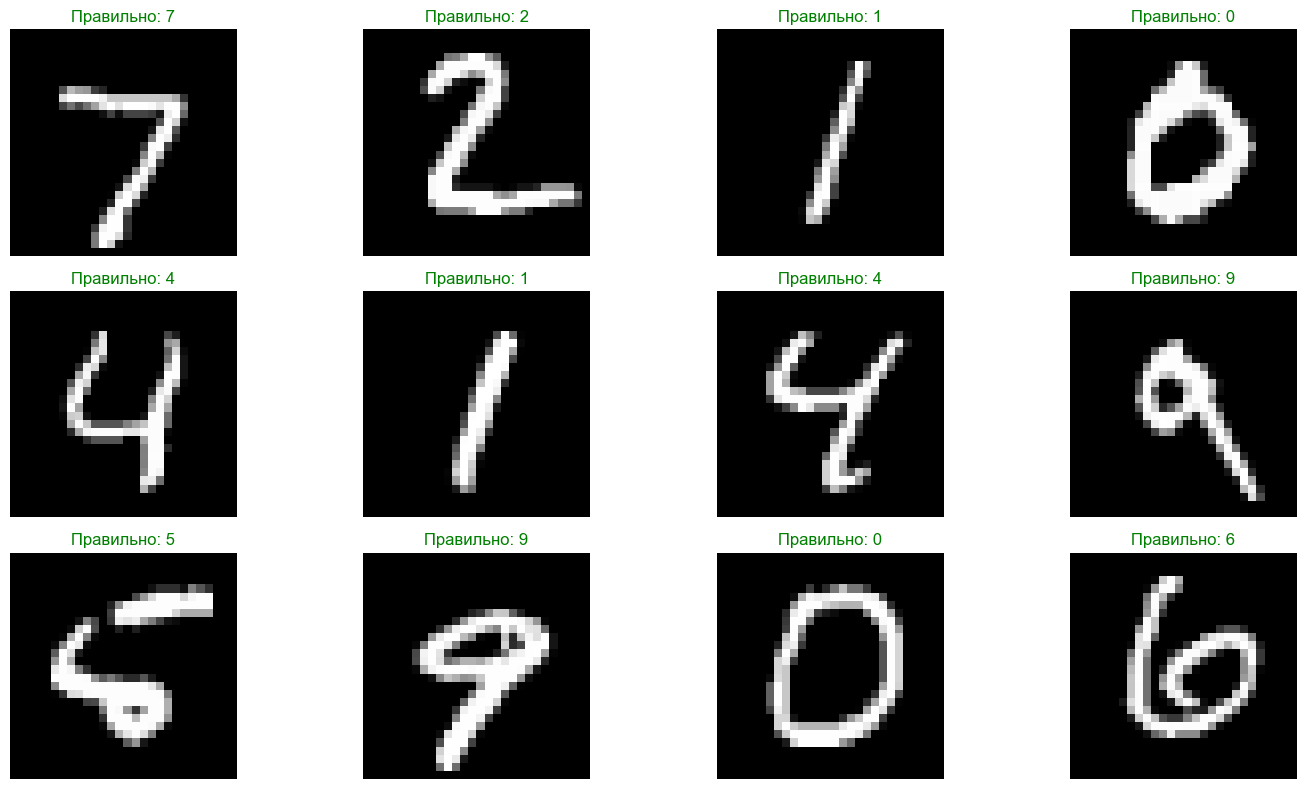

In [11]:
def show_predictions(images, true_labels, pred_labels, num_images=12):
    plt.figure(figsize=(15, 8))
    for i in range(num_images):
        plt.subplot(3, 4, i + 1)
        plt.imshow(images[i], cmap='gray')
        
        true_label = true_labels[i]
        pred_label = pred_labels[i]
        
        if true_label == pred_label:
            color = 'green'
            title = f'Правильно: {pred_label}'
        else:
            color = 'red'
            title = f'Помилка: {true_label}→{pred_label}'
            
        plt.title(title, color=color)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

show_predictions(x_test, y_test,і y_pred_classes, 12)


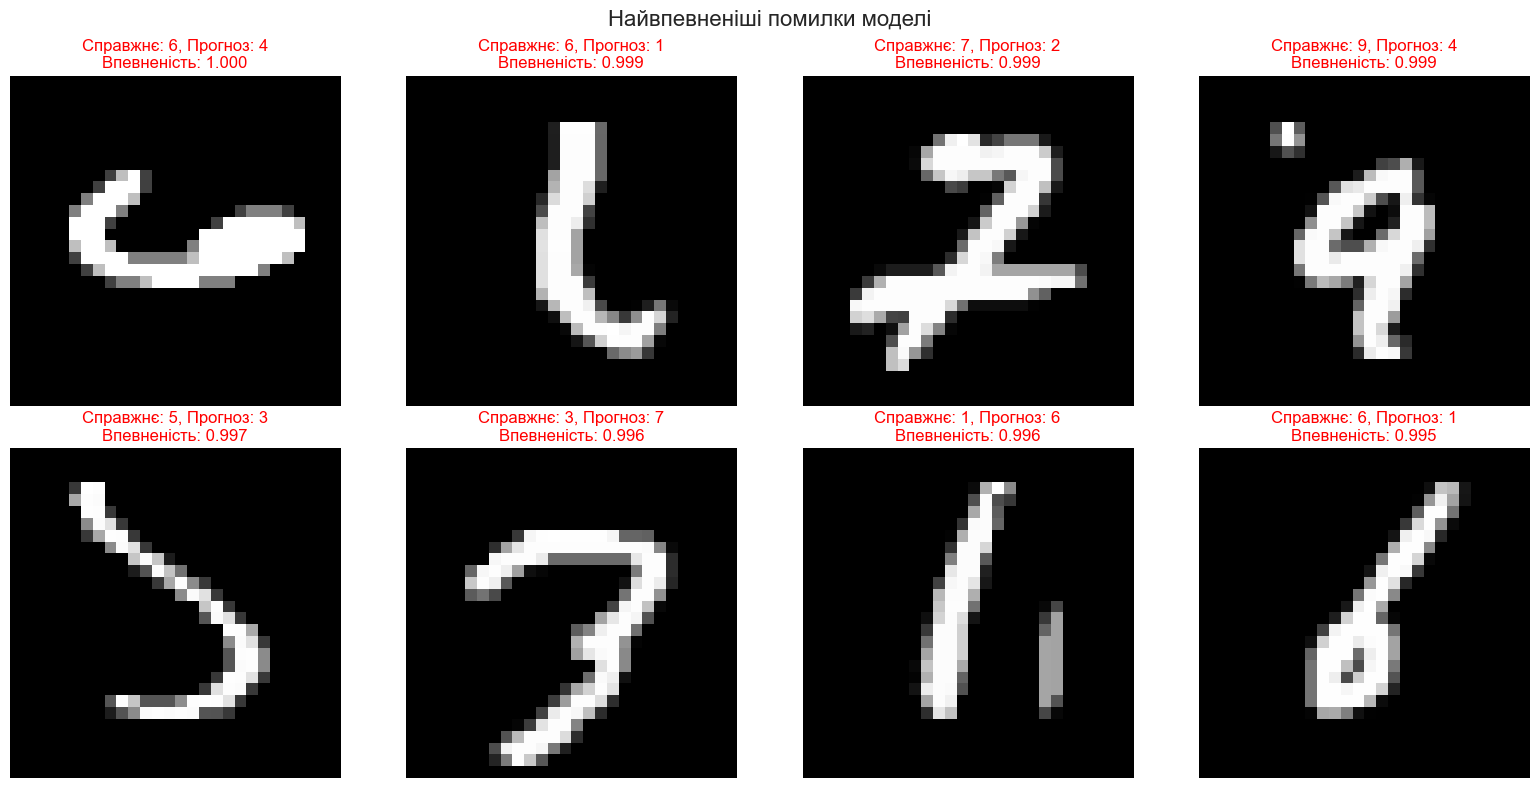

In [12]:
def show_worst_predictions(images, true_labels, pred_probs, num_images=8):
    pred_labels = np.argmax(pred_probs, axis=1)

    wrong_indices = np.where(pred_labels != true_labels)[0]

    wrong_confidences = []
    for idx in wrong_indices:
        confidence = pred_probs[idx][pred_labels[idx]]
        wrong_confidences.append((idx, confidence))

    wrong_confidences.sort(key=lambda x: x[1], reverse=True)
    
    plt.figure(figsize=(16, 8))
    for i in range(min(num_images, len(wrong_confidences))):
        idx, confidence = wrong_confidences[i]
        
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[idx], cmap='gray')
        
        true_label = true_labels[idx]
        pred_label = pred_labels[idx]
        
        plt.title(f'Справжнє: {true_label}, Прогноз: {pred_label}\nВпевненість: {confidence:.3f}', 
                 color='red')
        plt.axis('off')
    
    plt.suptitle('Найвпевненіші помилки моделі', fontsize=16)
    plt.tight_layout()
    plt.show()

show_worst_predictions(x_test, y_test, y_pred, 8)
